In [103]:
import pandas as pd 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 

In [140]:
print("pandas:", pd.__version__)
print("re: built-in module (no version)")
print("matplotlib:", plt.matplotlib.__version__)
print("seaborn:", sns.__version__)
print("os: built-in module (no version)")

pandas: 2.2.2
re: built-in module (no version)
matplotlib: 3.9.2
seaborn: 0.13.2
os: built-in module (no version)


In [104]:
# load all file types with profiling data
#damaging mutations matrix 
base_dir = r"C:\Users\gli2\Desktop\DepMap"
damaging_mutations_df = pd.read_csv(os.path.join(base_dir, "OmicsSomaticMutationsMatrixDamaging.csv"),index_col = 0 )
#omics profiles 
omics_profiles = pd.read_csv(os.path.join(base_dir, "OmicsProfiles.csv"), index_col=0)
#omics expresion data 
omics_expression = pd.read_csv(os.path.join(base_dir, "OmicsExpressionProteinCodingGenesTPMLogp1.csv"), index_col=0)
#omics copy number variation data 
omics_cnv = pd.read_csv(os.path.join(base_dir, "OmicsCNGeneWGS.csv"), index_col=0)
#estimated gene dependency probability based on CRISPR data 
CRISPR_dependency = pd.read_csv(os.path.join(base_dir, "CRISPRGeneDependency.csv"), index_col=0)

In [105]:
CRISPR_dependency.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,0.060766,0.015337,0.018333,0.059329,0.030781,0.004138,0.042726,0.023741,0.005335,0.020047,...,0.057542,0.007284,0.006179,0.002290,0.005082,0.154139,0.015921,0.011625,0.007692,0.384953
ACH-000004,0.019593,0.040244,0.052607,0.024760,0.031599,0.103393,0.001659,0.032703,0.004635,0.004417,...,0.104620,0.295440,0.002318,0.009574,0.009118,0.011587,0.267795,0.007111,0.001783,0.047151
ACH-000005,0.045185,0.018934,0.006529,0.009393,0.059700,0.106374,0.006135,0.028993,0.063979,0.014945,...,0.136486,0.208732,0.024570,0.035936,0.024505,0.115228,0.052223,0.031486,0.015121,0.078978
ACH-000007,0.022271,0.044283,0.005599,0.003947,0.011994,0.018006,0.015094,0.081129,0.074674,0.002153,...,0.196510,0.268054,0.014823,0.001393,0.010218,0.036744,0.321639,0.017044,0.226997,0.416228
ACH-000009,0.021977,0.111835,0.016560,0.017707,0.010077,0.096259,0.022340,0.103605,0.019751,0.013053,...,0.234808,0.157538,0.035675,0.002442,0.077343,0.089601,0.610084,0.016042,0.033228,0.313245


In [6]:
#confirm cell line present in all data types
cell_line_name = "FADU" 
#check with omics profiles first 
match = omics_profiles[omics_profiles["StrippedCellLineName"].str.lower()== cell_line_name.lower()]


if match.empty: 
    print(f"Cell line '{cell_line_name}' not found in OmicsProfiles.")
else: 
    model_id = match.iloc[0]["ModelID"]
    profile_row = match.index[0]
    print(f"Found '{cell_line_name}' cell line, model ID: {model_id} (row {profile_row})")
    # check with damaging mutations matrix 
    if model_id in damaging_mutations_df.index: 
        row_mut = damaging_mutations_df.index.get_loc(model_id) 
        print(f"{cell_line_name} cell line (Model ID: {model_id}) present in mutations matrix at row {row_mut} ") 
    else: 
        print(f"{cell_line_name}not found in mutation matrix") 
    # check with CRISPR dependency 
    if model_id in CRISPR_dependency.index: 
        row_dep = CRISPR_dependency.index.get_loc(model_id) 
        print(f"{cell_line_name} cell line (Model ID: {model_id}) present in CRISPR dependencies at row {row_dep} ") 
    else: 
        print(f"{cell_line_name}not found in CRISPR dependency data") 
    # check with CNV
    if model_id in omics_cnv.index: 
        row_cnv = omics_cnv.index.get_loc(model_id) 
        print(f"{cell_line_name} cell line (Model ID: {model_id}) present in omics CNV at row {row_cnv} ") 
    else: 
        print(f"{cell_line_name}not found in omics CNV data") 
    #check with expression 
    if model_id in omics_expression.index: 
        row_exp = omics_expression.index.get_loc(model_id) 
        print(f"{cell_line_name} cell line (Model ID: {model_id}) present in omics expressions at row {row_exp} ") 
    else: 
        print(f"{cell_line_name}not found in expression data ") 

Found 'FADU' cell line, model ID: ACH-000846 (row 1885)
FADU cell line (Model ID: ACH-000846) present in mutations matrix at row 739 
FADU cell line (Model ID: ACH-000846) present in CRISPR dependencies at row 568 
FADU cell line (Model ID: ACH-000846) present in omics CNV at row 486 
FADU cell line (Model ID: ACH-000846) present in omics expressions at row 941 


Summary statistics for threshold 0.5:
count    1183.000000
mean     1873.589180
std       184.303386
min      1101.000000
25%      1739.000000
50%      1877.000000
75%      2009.000000
max      2466.000000
Name: 0.5, dtype: float64
Number of genes above threshold 0.5 in each cell line:
ACH-000459    1101
ACH-000350    1319
ACH-001454    1323
ACH-001360    1339
ACH-001651    1343
dtype: int64


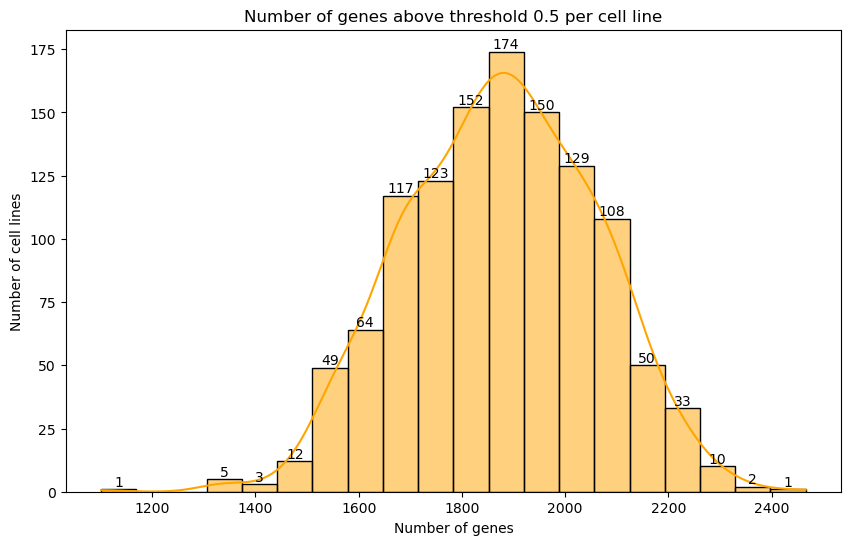

Summary statistics for threshold 0.6:
count    1183.000000
mean     1702.666948
std       177.335069
min       989.000000
25%      1575.500000
50%      1700.000000
75%      1831.500000
max      2305.000000
Name: 0.6, dtype: float64
Number of genes above threshold 0.6 in each cell line:
ACH-000459     989
ACH-001454    1171
ACH-000350    1172
ACH-001651    1207
ACH-000878    1226
dtype: int64


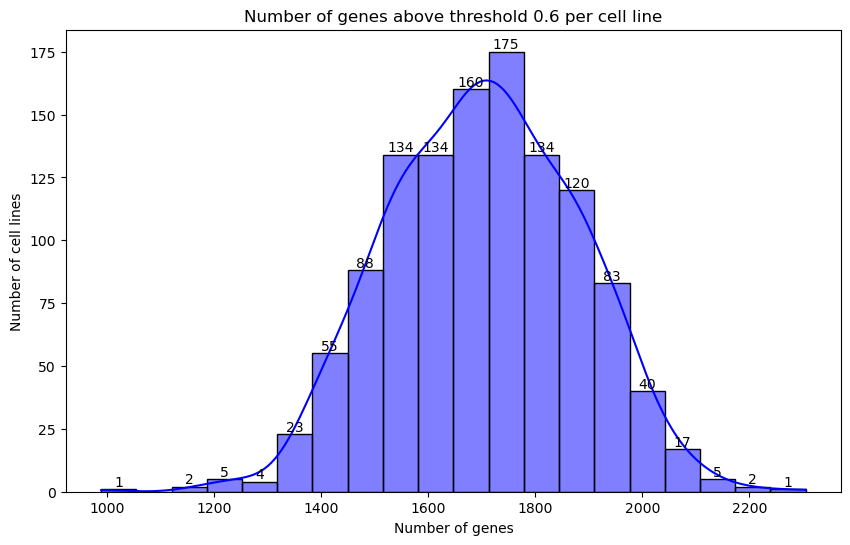

Summary statistics for threshold 0.7:
count    1183.000000
mean     1552.163145
std       172.790107
min       893.000000
25%      1427.000000
50%      1553.000000
75%      1674.500000
max      2156.000000
Name: 0.7, dtype: float64
Number of genes above threshold 0.7 in each cell line:
ACH-000459     893
ACH-001544     920
ACH-000350    1041
ACH-001454    1071
ACH-001651    1085
dtype: int64


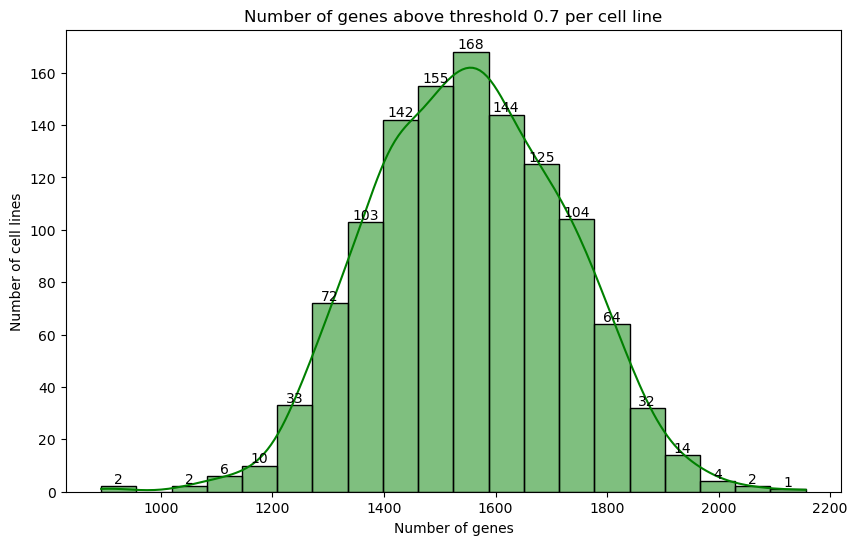

Summary statistics for threshold 0.8:
count    1183.000000
mean     1399.724429
std       167.934184
min       760.000000
25%      1278.000000
50%      1396.000000
75%      1515.000000
max      2019.000000
Name: 0.8, dtype: float64
Number of genes above threshold 0.8 in each cell line:
ACH-001544    760
ACH-000459    793
ACH-000350    916
ACH-001454    937
ACH-001651    958
dtype: int64


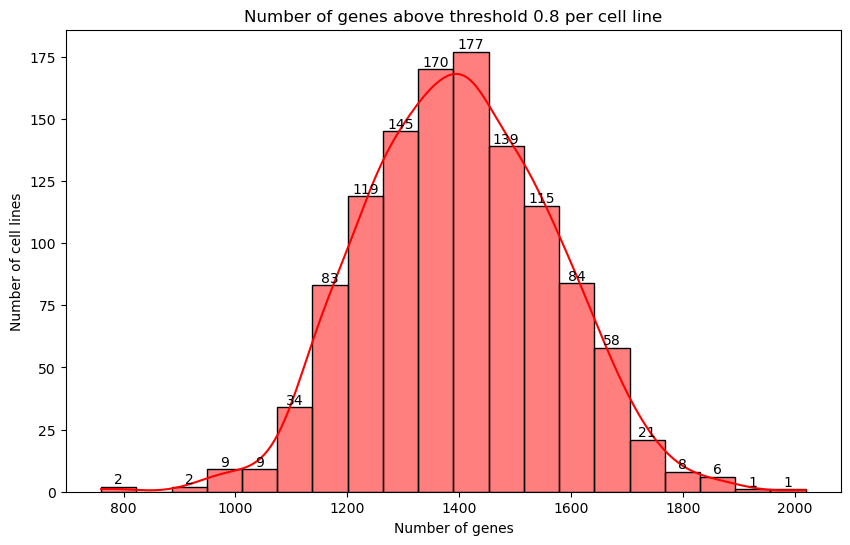

Summary statistics for threshold 0.9:
count    1183.000000
mean     1204.398986
std       163.726981
min       647.000000
25%      1091.500000
50%      1202.000000
75%      1320.000000
max      1779.000000
Name: 0.9, dtype: float64
Number of genes above threshold 0.9 in each cell line:
ACH-001544    647
ACH-000459    706
ACH-000774    712
ACH-000916    729
ACH-000350    740
dtype: int64


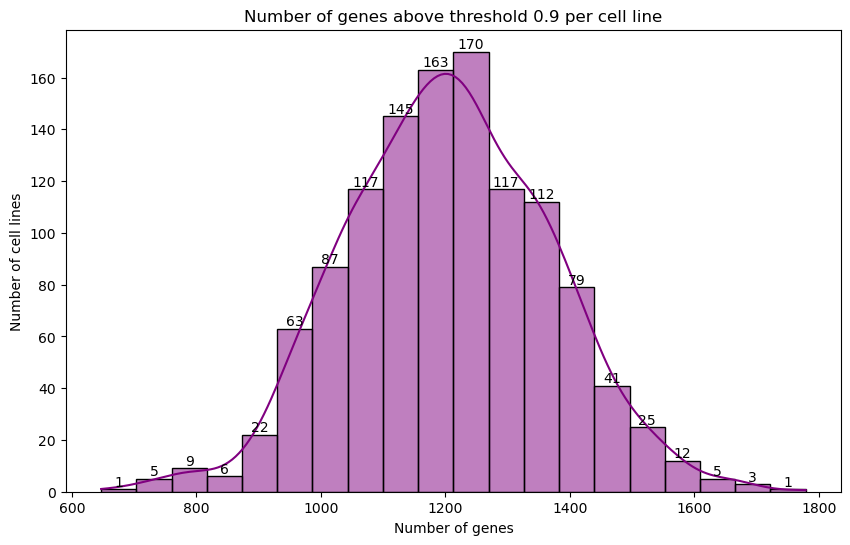

In [91]:
# plot the CRISPR dependency data 
# transpose the CRISPR dependency data for easier analysis
CRISPR_depndency_t = CRISPR_dependency.T 
# number of genes in each cell line passing a certain threshold    
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
threshold_summary = {}
colors = ['orange', 'blue', 'green', 'red', 'purple']
for i, threshold in enumerate(thresholds): 
    genes_above_threshold = (CRISPR_depndency_t >= threshold).sum(axis=0).sort_values()
    threshold_summary[threshold] = genes_above_threshold
    thredshold_summary_df = pd.DataFrame(threshold_summary)
    #summary of number of genes above threshold for each cell line
    summary_stats = thredshold_summary_df.describe(percentiles=[0.25, 0.5, 0.75])
    print(f"Summary statistics for threshold {threshold}:")
    print(summary_stats[threshold])
    print(f"Number of genes above threshold {threshold} in each cell line:")
    print(genes_above_threshold.head(5))
    # plot number of genes above threshold for each cell line 
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(genes_above_threshold, bins=20, kde=True, color=colors[i % len(colors)])
    plt.title(f"Number of genes above threshold {threshold} per cell line")
    plt.xlabel("Number of genes")
    plt.ylabel("Number of cell lines")
    for patch in ax.patches:
        count = int(patch.get_height())
        if count > 0: 
            ax.annotate(f"{count}", 
                        (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                        ha='center', va='bottom')
    plt.show()


Summary statistics for FADU cell line CRISPR dependency probabilities:
count    17916.000000
mean         0.127785
std          0.264987
min          0.000009
25%          0.007138
50%          0.019772
75%          0.068388
max          1.000000
Name: ACH-000846, dtype: float64
genes in FADU passing the 0.5 gene dependency threshold: 1147
Dependency score distribution for FADU cell line:
ACH-000846
0-0.25      15546
0.25-0.5      599
0.5-0.7       273
0.7-0.9       351
0.9-1.0      1147
Name: count, dtype: int64


Text(0, 0.5, 'Number of Genes')

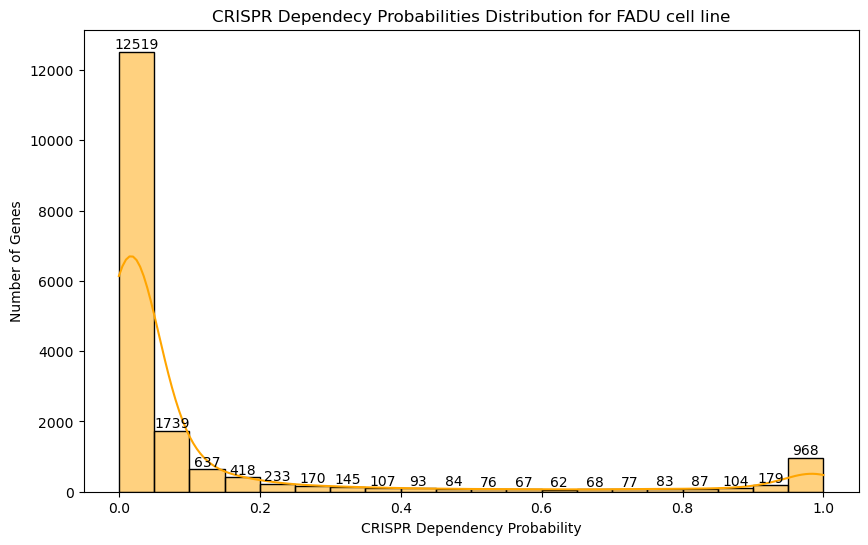

In [136]:
# plotting the CRISPR dependency data for a specific cell line
# get specific cell line gene dependency data summary
cell_line_data = CRISPR_dependency.loc[model_id]
print(f"Summary statistics for {cell_line_name} cell line CRISPR dependency probabilities:")
print(cell_line_data.describe())
# get the genes above the threshold for the specific cell line
threshold = 0.5
cell_line_genes_above_threshold = genes_above_threshold[cell_line_data.name]
print(f"genes in {cell_line_name} passing the {threshold} gene dependency threshold: {cell_line_genes_above_threshold}")
# make it for multiple thresholds???? 
#bucket counts 
bin_counts=pd.cut(cell_line_data, bins=[0, 0.25, 0.5,0.7, 0.9, 1.0], labels=["0-0.25", "0.25-0.5", "0.5-0.7", "0.7-0.9", "0.9-1.0"]).value_counts().sort_index()
print(f"Dependency score distribution for {cell_line_name} cell line:")
print(bin_counts)
# plot distirbution for the selected cell line 
plt.figure(figsize=(10, 6))
ax = sns.histplot(cell_line_data, bins=20, kde=True, color ='orange')
for pat in ax.patches:
    if pat.get_height() > 0:
        ax.annotate(f'{int(pat.get_height())}', 
                    (pat.get_x() + pat.get_width() / 2, pat.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black') 
plt.title(f"CRISPR Dependecy Probabilities Distribution for {cell_line_name} cell line")
plt.xlabel("CRISPR Dependency Probability")
plt.ylabel("Number of Genes")
# will come back to this and apply the uniprot mapping for evaluation process - so relevant genes can be identified on the same uniprot naming basis ?  

In [118]:
# pipeline for making the prize file 
# get the gene symbols from damaging mutations matrix as input file for Uniprot web service 
# use gene numbers instead of gene symbols 
preprocessed_dir = os.path.join(base_dir, "preprocessing")
os.makedirs(preprocessed_dir, exist_ok=True)
gene_columns = damaging_mutations_df.columns.tolist()[1:]
print(gene_columns)
gene_numbers = [re.search(r'\(([^)]+)\)', col).group(1) for col in gene_columns if isinstance(col, str) and "unknown" not in col.lower() and re.search(r'\(([^)]+)\)', col)]   
#get rid of unknown gene numbers saved as ""s 
genes_numbers_df = pd.DataFrame(gene_numbers, columns=["GeneNumber"])
print(genes_numbers_df.head())
#save the gene numbers to a csv file for uniprot mapping
gene_columns_df = pd.DataFrame(gene_columns, columns=["GeneColumns"])
gene_columns_df.to_csv(os.path.join(preprocessed_dir, "gene_columns.txt"), index=False, sep='\t', header=True)
genes_numbers_df.to_csv(os.path.join(preprocessed_dir, "gene_numbers.txt"), index=False, sep='\t', header=True)

['LINC01128 (643837)', 'LINC02593 (100130417)', 'SAMD11 (148398)', 'NOC2L (26155)', 'KLHL17 (339451)', 'PLEKHN1 (84069)', 'PERM1 (84808)', 'HES4 (57801)', 'ISG15 (9636)', 'AGRN (375790)', 'RNF223 (401934)', 'C1orf159 (54991)', 'TTLL10 (254173)', 'TNFRSF18 (8784)', 'TNFRSF4 (7293)', 'SDF4 (51150)', 'B3GALT6 (126792)', 'C1QTNF12 (388581)', 'UBE2J2 (118424)', 'SCNN1D (6339)', 'ACAP3 (116983)', 'PUSL1 (126789)', 'INTS11 (54973)', 'CPTP (80772)', 'TAS1R3 (83756)', 'DVL1 (1855)', 'MXRA8 (54587)', 'AURKAIP1 (54998)', 'CCNL2 (81669)', 'MRPL20 (55052)', 'ANKRD65 (441869)', 'TMEM88B (643965)', 'VWA1 (64856)', 'ATAD3C (219293)', 'ATAD3B (83858)', 'ATAD3A (55210)', 'FNDC10 (643988)', 'MIB2 (142678)', 'MMP23B (8510)', 'CDK11B (984)', 'SLC35E2B (728661)', 'CDK11A (728642)', 'NADK (65220)', 'GNB1 (2782)', 'CALML6 (163688)', 'TMEM52 (339456)', 'CFAP74 (85452)', 'GABRD (2563)', 'PRKCZ (5590)', 'FAAP20 (199990)', 'SKI (6497)', 'MORN1 (79906)', 'RER1 (11079)', 'PEX10 (5192)', 'PLCH2 (9651)', 'PANK4 (5522

In [135]:
#mapping task ran on uniprot web service 7/24/2025, from GeneID to UniprotKB 
raw_id_mapping = pd.read_csv(os.path.join(preprocessed_dir, "raw_uniprot_idmapping_2025_07_24.tsv"), sep='\t')
raw_id_mapping
# multiply mappings for the same gene index number - duplicates are unreviewed, use reviewed only
id_mapping = raw_id_mapping[raw_id_mapping["Reviewed"] == "reviewed"]
id_mapping
# check for reviewed unique mappings 
unique_mappings = id_mapping['From'].unique()
print(f"Number of unique reviewed mappings: {len(unique_mappings)}")   
id_mapping.to_csv(os.path.join(preprocessed_dir, "reviewed_id_mapping_2025_07_24.tsv"), sep='\t', index=False, header=True)


Number of unique reviewed mappings: 17498


In [ ]:
#check for duplicates 
duplicate_ids = id_mapping['From'].value_counts()   
duplicate_ids = duplicate_ids[duplicate_ids > 1]
duplicated_entries = id_mapping[id_mapping['From'].isin(duplicate_ids.index)]
unique_duplicates = duplicated_entries['From'].unique()
print(f"Number of unique reviewed mappings: {len(unique_duplicates)}")   
# duplicated_entries.to_csv(os.path.join(preprocessed_dir, "duplicated_mapping_entries.tsv"), sep='\t', index=False)
duplicated_entries
#need further work to go with gene index number mapping 

Number of unique reviewed mappings: 32


,From,Entry,Entry Name,Protein names,Gene Names,Reviewed
764,23499,O94854,K0754_HUMAN,"Microtubule-actin cross-linking factor 1, isof...",MACF1 KIAA0754,reviewed
765,23499,Q9UPN3,MACF1_HUMAN,"Microtubule-actin cross-linking factor 1, isof...",MACF1 ABP620 ACF7 KIAA0465 KIAA0754 KIAA1251,reviewed
2353,9910,B7ZAP0,RBG10_HUMAN,"Rab GTPase-activating protein 1-like, isoform 10",RABGAP1L HHL KIAA0471,reviewed
2354,9910,Q5R372,RBG1L_HUMAN,Rab GTPase-activating protein 1-like,RABGAP1L HHL KIAA0471,reviewed
2394,163590,Q8NFQ8,TOIP2_HUMAN,Torsin-1A-interacting protein 2 (Lumenal domai...,TOR1AIP2 IFRG15 LULL1,reviewed
...,...,...,...,...,...,...
29544,27433,Q8N2E6,TOR2X_HUMAN,Prosalusin (Torsin family 2 member A) (Torsin-...,TOR2A HEMBA1005096 PSEC0218,reviewed
30001,6399,P0DI81,TPC2A_HUMAN,Trafficking protein particle complex subunit 2...,TRAPPC2 SEDL,reviewed
30002,6399,P0DI82,TPC2B_HUMAN,Trafficking protein particle complex subunit 2...,TRAPPC2B SEDLP1 TRAPPC2.19 TRAPPC2P1,reviewed
30621,11013,P0CG34,TB15A_HUMAN,Thymosin beta-15A (NB thymosin beta) (Thymosin...,TMSB15A TMSL8 TMSNB,reviewed


In [141]:
# pipeline for mapping and making prize file using Gene Symbols instead 
# get the gene symbols from damaging mutations matrix as input file for Uniprot web service
gene_columns = damaging_mutations_df.columns.tolist()[1:]
gene_symbols = [re.match(r"^(.*?) \(", col).group(1) if " (" in col else col for col in gene_columns]
genes_df = pd.DataFrame(gene_symbols, columns=["GeneSymbol"])
print(genes_df.head())
# genes_df.to_csv("/Users/gracel/Desktop/DepMap/DamamingMutationsGeneSymbols_20250718.csv", index=False)

  GeneSymbol
0  LINC01128
1  LINC02593
2     SAMD11
3      NOC2L
4     KLHL17


In [93]:
uniprot_map = pd.read_csv(r"C:\Users\gli2\Desktop\DepMap\DamagingMutations_idMapping_20250718.tsv", sep = '\t')
uniprot_map.head()

,From,Entry,Reviewed,Protein names,Gene Names,Length,Entry Name
0,SAMD11,Q96NU1,reviewed,Sterile alpha motif domain-containing protein ...,SAMD11,681,SAM11_HUMAN
1,NOC2L,Q9Y3T9,reviewed,Nucleolar complex protein 2 homolog (Protein N...,NOC2L NIR,749,NOC2L_HUMAN
2,KLHL17,Q6TDP4,reviewed,Kelch-like protein 17 (Actinfilin),KLHL17 AF,642,KLH17_HUMAN
3,PLEKHN1,Q494U1,reviewed,Pleckstrin homology domain-containing family N...,PLEKHN1 CLPABP,611,PKHN1_HUMAN
4,PERM1,Q5SV97,reviewed,PGC-1 and ERR-induced regulator in muscle prot...,PERM1 C1orf170,790,PERM1_HUMAN


In [52]:
# extract mutation data for the cell line 
mutation_row = damaging_mutations_df.loc[model_id]
print(f"Summary of damaging mutations data for {cell_line_name} cell line (Model ID: {model_id}):")
print(mutation_row.describe())
print(mutation_row.value_counts().sort_index()  )
# mapping gene symbols to Uniprot IDs 
gene_to_uniprot = dict(zip(uniprot_map["From"], uniprot_map["Entry Name"]))
rows = []
for col, score in mutation_row.items(): 
    #extract gene symbols for mapping
    match = re.match(r"^(.*?) \(", col)
    gene_symbol = match.group(1) if match else col
    # only map for gene symbols in uniprot map 
    if gene_symbol in gene_to_uniprot:
        uniprot_id = gene_to_uniprot[gene_symbol]
        rows.append([gene_symbol, uniprot_id, score])
mapped_prizes_df = pd.DataFrame(rows, columns=["GeneSymbol", "UniprotID", "Prize"])
mapped_prizes_df

Summary of damaging mutations data for FADU cell line (Model ID: ACH-000846):
count    19517.000000
mean         0.003228
std          0.067453
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ACH-000846, dtype: float64
ACH-000846
0.0    19467
1.0       37
2.0       13
Name: count, dtype: int64


,GeneSymbol,UniprotID,Prize
0,SAMD11,SAM11_HUMAN,0.0
1,NOC2L,NOC2L_HUMAN,0.0
2,KLHL17,KLH17_HUMAN,0.0
3,PLEKHN1,PKHN1_HUMAN,0.0
4,PERM1,PERM1_HUMAN,0.0
...,...,...,...
18012,LSM5,LSM5_HUMAN,0.0
18013,LINC02902,CG065_HUMAN,0.0
18014,ANKRD19P,ANR19_HUMAN,0.0
18015,LINC00587,CI107_HUMAN,0.0


In [66]:
prizes_input_file = mapped_prizes_df[mapped_prizes_df.columns[1:]].rename(columns={"UniprotID": "NODEID", "Prize":"prize"})
# save the prizes input as txt for spras 
output_path =fr"C:\Users\gli2\Desktop\DepMap\{cell_line_name}_cell_line_prizes_input.txt"
prizes_input_file.to_csv(output_path, sep='\t', index=False, header=True)
print(f"Prize file saved for cell line '{cell_line_name}' at: {output_path}")
prizes_input_file

Prize file saved for cell line 'FADU' at: C:\Users\gli2\Desktop\DepMap\FADU_cell_line_prizes_input.txt


,NODEID,prize
0,SAM11_HUMAN,0.0
1,NOC2L_HUMAN,0.0
2,KLH17_HUMAN,0.0
3,PKHN1_HUMAN,0.0
4,PERM1_HUMAN,0.0
...,...,...
18012,LSM5_HUMAN,0.0
18013,CG065_HUMAN,0.0
18014,ANR19_HUMAN,0.0
18015,CI107_HUMAN,0.0


In [67]:
nonzero_prizes_input_file = prizes_input_file[prizes_input_file["prize"] > 0]
nonzero_prizes_input_file
nonzero_output_path =fr"C:\Users\gli2\Desktop\DepMap\{cell_line_name}_nonzero_cell_line_prizes_input.txt"
nonzero_prizes_input_file.to_csv(nonzero_output_path, sep='\t', index=False, header=True)
print(f"Prize file saved for cell line '{cell_line_name}' at: {nonzero_output_path}")
nonzero_prizes_input_file

Prize file saved for cell line 'FADU' at: C:\Users\gli2\Desktop\DepMap\FADU_nonzero_cell_line_prizes_input.txt


,NODEID,prize
301,PDK1L_HUMAN,1.0
682,EFCB7_HUMAN,1.0
825,GDE_HUMAN,1.0
1255,IGSF8_HUMAN,1.0
1394,ASTN1_HUMAN,1.0
1939,MGLYR_HUMAN,1.0
2039,PHIPL_HUMAN,1.0
2210,CPEB3_HUMAN,1.0
2658,ACD_HUMAN,1.0
2778,ANO3_HUMAN,1.0


In [148]:
# pipeline for making gold standard file for selected cell line 
# map Uniprot IDs to gene symbols in the CRISPR dependency data 
cell_line_dependency = CRISPR_dependency.loc[model_id]
filtered_dependency = cell_line_dependency[cell_line_dependency > 0.5]
mapped_dependency = [] 
for gene, dependency in filtered_dependency.items():
    match = re.match(r"^(.*?) \(", gene)
    gene_symbol = match.group(1) if match else gene
    if gene_symbol in gene_to_uniprot:
        uniprot_id = gene_to_uniprot[gene_symbol]
        mapped_dependency.append([gene_symbol, uniprot_id, dependency])
mapped_dependency_df = pd.DataFrame(mapped_dependency, columns=["GeneSymbol", "UniprotID", "Dependency"])
print(f"Mapped CRISPR dependency data for cell line '{cell_line_name}':")
print(mapped_dependency_df)
# save mapped dependency as gold standard file 
gold_standard_output_path = os.path.join(preprocessed_dir, f"{cell_line_name}_gold_standard.txt")
mapped_dependency_df.to_csv(gold_standard_output_path, sep='\t', index=False, header=True)

Mapped CRISPR dependency data for cell line 'FADU':
     GeneSymbol    UniprotID  Dependency
0          AAMP   AAMP_HUMAN    0.921866
1         AARS1   SYAC_HUMAN    0.999964
2         AARS2   SYAM_HUMAN    0.673308
3          AATF   AATF_HUMAN    0.949581
4         ABCB7  ABCB7_HUMAN    0.982660
...         ...          ...         ...
1609     ZNF830  ZN830_HUMAN    0.950492
1610     ZNHIT2  ZNHI2_HUMAN    0.998258
1611     ZNHIT6   BCD1_HUMAN    0.850656
1612       ZPR1   ZPR1_HUMAN    0.992531
1613      ZRSR2  U2AFM_HUMAN    0.953605

[1614 rows x 3 columns]
